In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Data input
train = pd.read_csv("/Users/allen/Kaggle_py/Titanic/train.csv")
test = pd.read_csv("/Users/allen/Kaggle_py/Titanic/test.csv")
submit = pd.read_csv('/Users/allen/Kaggle_py/Titanic/gender_submission.csv')

In [3]:
#Data Exploration
train.info()
print("-----")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null

In [4]:
#Cabin has too much missing values
train = train.drop(columns = ["Cabin"])
test = test.drop(columns = ["Cabin"])

In [5]:
pd.options.display.max_rows = 999
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,C


In [6]:
#Drop unrelated columns
train = train.drop(columns = "Ticket")
test = test.drop(columns = "Ticket")

#train = train.drop(columns = "Name")
#test = test.drop(columns = "Name")

In [7]:
train["Title"] = train.Name.str.extract("([A-Za-z]+)\.", expand = False)
train["Title"] = train["Title"].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
train["Title"] = train["Title"].replace("Mlle", "Miss")
train["Title"] = train["Title"].replace("Ms", "Miss")
train["Title"] = train["Title"].replace("Mme", "Miss")
train["Title"] = train["Title"].map({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5})
train["Title"] = train["Title"].fillna(0)
train = train.drop(columns = ["Name"])

test["Title"] = test.Name.str.extract("([A-Za-z]+)\.", expand = False)
test["Title"] = test["Title"].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
test["Title"] = test["Title"].replace("Mlle", "Miss")
test["Title"] = test["Title"].replace("Ms", "Miss")
test["Title"] = test["Title"].replace("Mme", "Miss")
test["Title"] = test["Title"].map({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5})
test["Title"] = test["Title"].fillna(0)
test = test.drop(columns = ["Name"])

In [8]:
train.info()
print("-----")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       889 non-null object
Title          891 non-null int64
dtypes: float64(2), int64(6), object(2)
memory usage: 69.7+ KB
-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           417 non-null float64
Embarked       418 non-null object
Title          418 non-null int64
dtypes: float64(2), int64(5), object(2)
memory usage: 29.5+ KB


In [9]:
#Data Exploration
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Title
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.727273
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,1.029196
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,5.000000


In [10]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Title
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000,418.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188,1.741627
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576,1.006091
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800,1.000000
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200,1.000000
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000,2.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,5.000000


In [11]:
#Filling NAs
freq_train = train.Embarked.dropna().mode()[0]
freq_test = test.Embarked.dropna().mode()[0]
train["Embarked"] = train["Embarked"].fillna(freq_train)
test["Embarked"] = test["Embarked"].fillna(freq_test)

median_fare = test["Fare"].notnull().median()
test["Fare"] = test["Fare"].fillna(median_fare)

#Using RFRegressor
from sklearn.ensemble import RandomForestRegressor

def finding_missing(df):
    age_df = df[["Age", "Pclass", "SibSp", "Parch", "Fare"]]
    unknown = age_df[age_df.Age.isnull()].as_matrix()
    known = age_df[age_df.Age.notnull()].as_matrix()
    
    y = known[:, 0]
    x = known[:, 1:]
    rf_age = RandomForestRegressor(random_state = 0, n_estimators = 2000, n_jobs = -1)
    rf_age.fit(x, y)
    
    predict_age = rf_age.predict(unknown[:, 1:])
    df.loc[(df.Age.isnull()), "Age"] = predict_age
    
    return df

In [12]:
train_df = train.drop(columns = "Survived")
combine = [train_df, test]
combine = pd.concat(combine)
combine = finding_missing(combine)

In [13]:
train["Age"] = combine["Age"][0:len(train.index)]
test["Age"] = combine["Age"][len(train.index):]

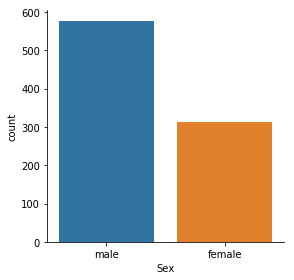

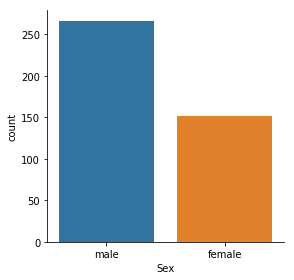

In [14]:
#Visualization
sns.factorplot("Sex", data = train, kind = "count")
sns.factorplot("Sex", data = test, kind = "count")

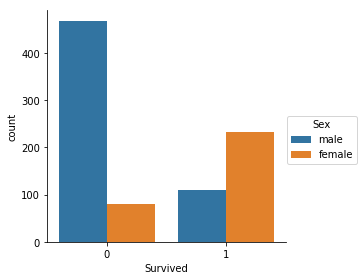

In [15]:
sns.factorplot("Survived", data = train, kind = "count", hue = "Sex")

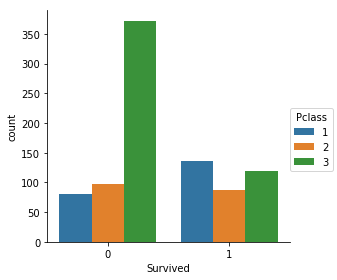

In [16]:
sns.factorplot("Survived", data = train, kind = "count", hue = "Pclass")

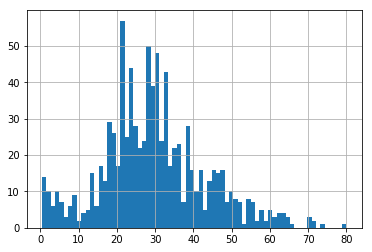

In [17]:
train["Age"].hist(bins = 70)

In [18]:
#Categorize Age
train.loc[train["Age"] <= 16, "Age"] = 0
train.loc[(train["Age"] > 16) & (train["Age"] <= 32), "Age"] = 1
train.loc[(train["Age"] > 32) & (train["Age"] <= 48), "Age"] = 2
train.loc[(train["Age"] > 48) & (train["Age"] <= 64), "Age"] = 3
train.loc[train["Age"] >= 64, "Age"] = 4

test.loc[test["Age"] <= 16, "Age"] = 0
test.loc[(test["Age"] > 16) & (test["Age"] <= 32), "Age"] = 1
test.loc[(test["Age"] > 32) & (test["Age"] <= 48), "Age"] = 2
test.loc[(test["Age"] > 48) & (test["Age"] <= 64), "Age"] = 3
test.loc[test["Age"] >= 64, "Age"] = 4

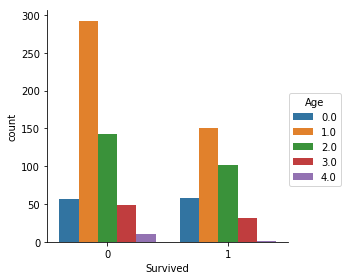

In [19]:
sns.factorplot("Survived", data = train, kind = "count", hue = "Age")

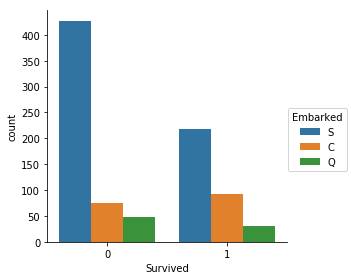

In [20]:
sns.factorplot("Survived", data = train, kind = "count", hue = "Embarked")

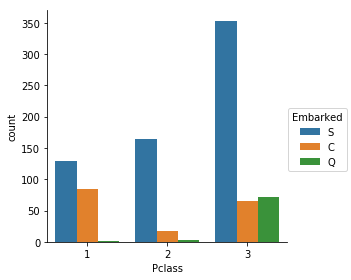

In [21]:
sns.factorplot("Pclass", data = train, kind = "count", hue = "Embarked")

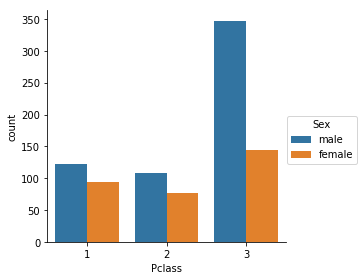

In [22]:
sns.factorplot("Pclass", data = train, kind = "count", hue = "Sex")

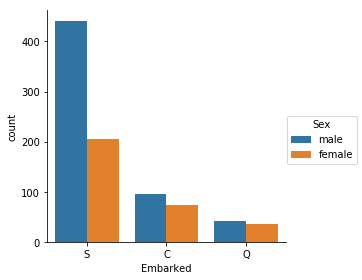

In [23]:
sns.factorplot("Embarked", data = train, kind = "count", hue = "Sex")

In [24]:
# Convert Sex into Numerical
train["Sex"] = train["Sex"].map({"female":0, "male":1}).astype(int)
test["Sex"] = test["Sex"].map({"female":0, "male":1}).astype(int)

In [25]:
train["Embarked"] = train["Embarked"].map({"S":1,"Q":2, "C":3}).astype(int)
test["Embarked"] = test["Embarked"].map({"S":1,"Q":2, "C":3}).astype(int)

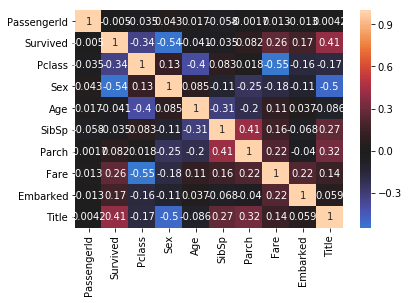

In [26]:
cormat = train.corr()
sns.heatmap(cormat, vmax = 1, annot = True, center = 0)

In [27]:
#Incorporate SibSp and Parch
train["IsAlone"] = 0
train["Family"] = train["SibSp"] + train["Parch"]
train = train.drop(columns = ["SibSp", "Parch"])
train.loc[train["Family"] == 0, "IsAlone"] = 1

test["IsAlone"] = 0
test["Family"] = test["SibSp"] + test["Parch"]
test = test.drop(columns = ["SibSp", "Parch"])
test.loc[test["Family"] == 0, "IsAlone"] = 1

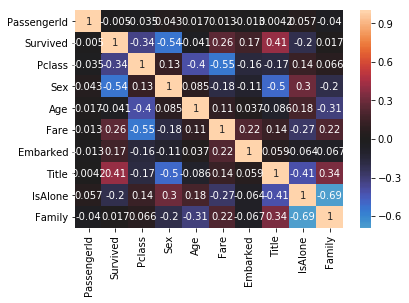

In [28]:
cormat = train.corr()
sns.heatmap(cormat, annot = True, center = 0)
#Family redundant?

In [29]:
#Deal with Fare? try categorization
train.loc[train["Fare"] <= 7.91, "Fare"] = 0
train.loc[(train["Fare"] > 7.91) & (train["Fare"] <= 14.45), "Fare"] = 1
train.loc[(train["Fare"] > 14.45) & (train["Fare"] <= 31), "Fare"] = 2
train.loc[train["Fare"] >= 31, "Fare"] = 3

test.loc[test["Fare"] <= 7.91, "Fare"] = 0
test.loc[(test["Fare"] > 7.91) & (test["Fare"] <= 14.45), "Fare"] = 1
test.loc[(test["Fare"] > 14.45) & (test["Fare"] <= 31), "Fare"] = 2
test.loc[test["Fare"] >= 31, "Fare"] = 3

In [30]:
y = train["Survived"]
train = train.drop(columns = ["Survived"])

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train, y, test_size=0.2, random_state=42 )

# modeling
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 500,
                            max_depth = 10,
                           oob_score = True)

x_train = x_train[["Title", "Pclass", "Sex", "Age", "Fare", "Embarked", "IsAlone", "Family"]]
x_test = x_test[["Title", "Pclass", "Sex", "Age", "Fare", "Embarked", "IsAlone", "Family"]]

rf.fit(x_train, y_train)
print("OOB score: " + "%.4f" % rf.oob_score_)
rf.score(x_test, y_test)
rf.feature_importances_

OOB score: 0.8174


array([0.22581857, 0.14309699, 0.23275844, 0.09943616, 0.09868424,
       0.0588564 , 0.01758452, 0.12376467])

In [32]:
train = train[["Title", "Pclass", "Sex", "Age", "Fare", "Embarked", "IsAlone", "Family"]]
test = test[["Title", "Pclass", "Sex", "Age", "Fare", "Embarked", "IsAlone", "Family"]]

rf.fit(train, y)
print("OOB score: " + "%.4f" % rf.oob_score_)

rf_res =  rf.predict(test)
submit['Survived'] = rf_res
submit['Survived'] = submit['Survived'].astype(int)

OOB score: 0.8148


In [33]:
submit.to_csv("/Users/allen/Kaggle_py/Titanic/sub_1021.csv", index = False)